<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > Examen d'intelligence artificielle II - MIN 5A -  <img  src="   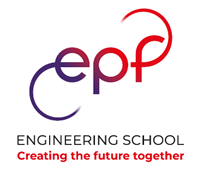" align="right"  width="100" > 
 <br>
     <br>
    <br>
 <hr>
</div>


MASSET Julia MIN



<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Partie classification </h2><hr>    
    <ol>
Vous allez utiliser pour résoudre un problème de classification la base de données
champignons.csv. Cette base de données comprend des entrées correspondantes à des
caractéristiques de champignons (surface, couleur, etc). La sortie correspond à la comestibilité des
champignons ('p' pour poisonous càd toxique et 'e' pour edible càd commestible).

 <br>
    </ol>
</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.1 Importez les données en utilisant la bibliothèque pandas et la fonction read_csv().<br><br>
1.2 Encodez les données en données chiffres plutôt que des lettres en exécutant les lignes de
code suivantes qui permettent de le faire :
<CODE>
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])
raw_data.head()
</CODE>
<br>
1.3 La fonction read_csv(), renvoie un DataFrame de plusieurs colonnes. Séparez les deux
variables X et Y en utilisant l’instruction iloc[] de telle sorte que les sorties Y correspondent
à la première colonne càd nom_bd.iloc[:,0] et les autres colonnes restantes correspondent aux
observations X.<br><br>
1.4 Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base
d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille
de test =0.33 et le paramètre shuffle à True.<br><br>
</div>

In [10]:
import pandas as pd

path="/content/champignons.csv"
df = pd.read_csv(path)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
#selection de la première colonne de notre dataset (la taille de la population)
Y = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset (le profit effectué)
X = df.iloc[0:len(df),1:] 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,shuffle=True)
print(X.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(8124, 22)
(5443, 22)
(5443,)
(2681, 22)



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 1 </B><br>
    <br>
1.5 Appliquez un classifieur en utilisant SVC avec comme paramètre kernel='linear'.<br><br>
1.6 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.7 Réalisez la prédiction sur les données de test.<br><br>
1.8 Affichez la matrice de confusion obtenue sur les données de test. <br>
    </div>

In [19]:
#méthode 1

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

print(confusion_matrix(Y_test, Y_pred))

[[1375   20]
 [  56 1230]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 2 </B><br>
    <br>
1.9 Implémentez un classifieur via SGDClassifier en prenant comme paramètre random_state=42.<br><br>
1.10 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.11 Réalisez la prédiction sur les données de test.<br><br>
1.12 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [20]:
#méthode 2

from  sklearn.linear_model  import  SGDClassifier
sg_clf = SGDClassifier(random_state=42)
sg_clf.fit(X_train, Y_train)
y_pred_sg = sg_clf.predict(X_test)

print(classification_report( Y_test ,  y_pred_sg))
print(confusion_matrix ( Y_test ,  y_pred_sg))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1395
           1       0.97      0.87      0.92      1286

    accuracy                           0.93      2681
   macro avg       0.93      0.92      0.93      2681
weighted avg       0.93      0.93      0.93      2681

[[1363   32]
 [ 164 1122]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 3 </B><br>
    <br>
1.13 Créer un classifieur implémenté via LinearSVC en utilisant comme paramètres : C=1,
dual=False, random_state=42, et un nombre d’itérations max = 1200000.<br><br>
1.14 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.15 Réalisez la prédiction sur les données de test.<br><br>
1.16 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [21]:
#méthode 3

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1,  dual=False, random_state=42,max_iter=1200000)),])

svm.fit(X_train, Y_train)
y_predict=svm.predict(X_test)


from  sklearn . metrics  import  confusion_matrix
from sklearn import metrics
print(metrics.classification_report( Y_test ,  y_predict))
print(confusion_matrix ( Y_test ,  y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1395
           1       0.95      0.94      0.95      1286

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681

[[1333   62]
 [  74 1212]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Etude comparative </B><br>
    <br>
1.17 Commentez les résultats obtenus pour les implémentations précédentes en expliquant
d’abord le nom et le principe de base de l’algorithme utilisé puis en présentant et en
discutant les résultats obtenus de chaque matrice de confusion et en fournissant à chaque
fois le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs.<br>
    </div>

In [ ]:
# 


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Validation croisée </B><br>
    <br>
1.18 Effectuez une validation croisée sur les données d’apprentissage en important la fonction
cross_val_score() de la librairie sklearn.model_selection et en l’utilisant avec 4 plis et en
choisissant un modèle parmi ceux des implémentations précédentes. Afficher le score de
chacun de ces 4 plis.<br><br>
1.19 Calculer et afficher le score global de la validation croisée sur la base d’apprentissage.<br><br>
1.20 Importez la fonction cross_val_predict() de la librairie sklearn.model_selection. Utiliser cette
fonction sur les données d’apprentissage en utilisant 4 plis et stockez le résultat dans une
variable Y_train_predict.<br><br>
1.21 Affichez la matrice de confusion obtenue sur la base d’apprentissage.<br><br>
1.22 Affichez les scores : prédiction, rappel et f1 sur la base d’apprentissage. Expliquez le but de
la validation croisée et que peut-on déduire des résultats obtenus.<br><br>
1.23 Récupérez les données de prédictions, rappels et thresholds (le seuil de décision) sur la base
d’apprentissage dans le but de tracer dans le même graphique la précision en fonction de
thresholds et le rappel en fonction de thresholds. A quoi correspond ce graphique.<br><br>
1.24 Tracer sur une autre figure la précision en fonction du rappel.<br><br>
1.25 Tracer la courbe ROC. Commentez le résultat de cette courbe.<br>
    </div>

In [22]:
from  sklearn . model_selection  import  cross_val_score  
print("cross_val_score = ", cross_val_score(clf,X_train,Y_train,cv=4)) 

#le score global = la moyenne des 4 scores précédents
from statistics import mean
print("score global = ",mean(cross_val_score(clf,X_train,Y_train,cv=4)))

cross_val_score =  [0.96326231 0.97281411 0.96987509 0.97058824]
score global =  0.9691349353848814


In [23]:
from sklearn.model_selection import cross_val_predict

Y_train_predict = cross_val_predict(clf,X_train,Y_train,cv=4)
print("cross_val_score = ", Y_train_predict) 

cross_val_score =  [0 0 0 ... 1 0 0]


In [24]:
from  sklearn . metrics  import  confusion_matrix

print(confusion_matrix ( Y_train ,  Y_train_predict))

[[2765   48]
 [ 120 2510]]


In [25]:
from  sklearn.metrics  import  precision_score,recall_score
print("precision = ",precision_score(Y_train, Y_train_predict))
 
print("rappel = ",recall_score(Y_train,Y_train_predict))

from  sklearn.metrics  import f1_score
print("f1 = ",f1_score(Y_train,Y_train_predict))

precision =  0.9812353401094606
rappel =  0.9543726235741445
f1 =  0.9676175790285275


**Réponse:**

La validation croisée est utilisée pour évaluer les performances d'un modèle d'IA sur des données que le modèle n'a pas vues lors de son entraînement. Le but de cette méthode est de mesurer la robustesse du modèle et de minimiser l'overfitting.

(5443,)


(0.0, 1.0)

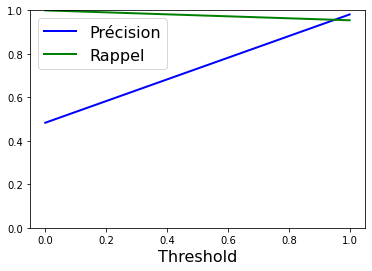

In [28]:
from  sklearn.metrics  import  precision_recall_curve
print(Y_train_predict.shape)
precisions,recalls,thresholds = precision_recall_curve(Y_train,Y_train_predict[:])

import  matplotlib
import  matplotlib.pyplot as plt

plt.plot(thresholds,precisions[:-1],'b-',label="Précision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Rappel",linewidth =2)
plt.xlabel("Threshold",fontsize =16)
plt.legend(loc="upper left",fontsize =16)
plt.ylim([0,1])

Text(0, 0.5, 'Précision')

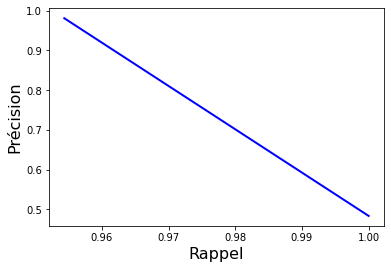

In [29]:
plt.plot(recalls[:-1],precisions[:-1],'b-',linewidth=2)
plt.xlabel("Rappel",fontsize =16)
plt.ylabel("Précision",fontsize =16)

Text(0, 0.5, 'taux de vrais positifs')

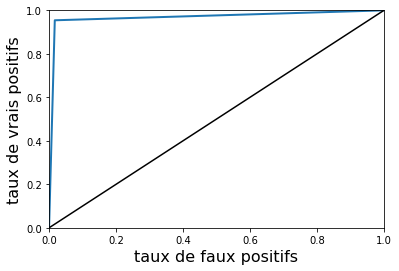

In [27]:
from  sklearn.metrics  import  roc_curve
fpr,tpr,thresholds = roc_curve(Y_train,Y_train_predict)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k-')
plt.axis([0,1,0,1])
plt.xlabel('taux de faux positifs',fontsize=16)
plt.ylabel('taux de vrais positifs' ,fontsize=16)

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>2.	Partie regression </h2><hr>    
    <ol> 
   
Pour cette partie, on vous demande d’utiliser des données synthétiques générées à partir des lignes de code suivantes : 
        
<CODE> 
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::1] += 0.2 * (0.5 - rng.rand(200))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
</CODE> <br>
</ol> 
</div>

In [30]:
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::1] += 0.2 * (0.5 - rng.rand(200))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
        <B> Méthode 1 </B><br>
    <br>
2.1 Construire un modèle d’arbre de régression de profondeur 3 pour ces données.<br><br>  
2.2 Entrainer le modèle construit sur la base X, y.<br><br>
2.3 Faites la prédiction sur la base de test pour produire y_predicted<br><br>
2.4 Affichez les données X, y en forme de nuage de points. Affichez le graphe de prédiction
sur le même graphe en rouge.<br>

</div>

In [31]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3, random_state=42)

In [32]:
clf.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [35]:
y_predicted = clf.predict(X_test)

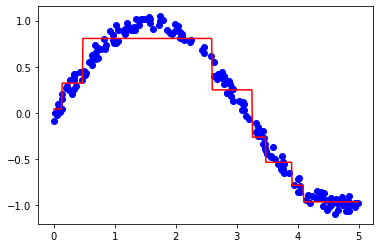

In [37]:
# Tracer le nuage de points
plt.scatter(X, y, color='blue')

# Tracer le graphe de prédiction
plt.plot(X_test, y_predicted, color='red')
plt.show()

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
            <B> Méthode 2 </B><br>
    <br>
2.5 Créez un modèle de régression polynomiale implémenté dans scikit-learn. Expliquez
comment se fait l’implémentation.<br><br>
2.6 Appliquez ce modèle aux données pour l’entrainer sur X, Y.<br><br>
2.7 Faites la prédiction sur X pour produire y_pred_poly.<br><br>
2.8 Affichez sur le graphe des données en affichant les données en forme de nuages de points
et l’allure du modèle en rouge.<br><br>
2.9 Affichez les scores RMSE et R2 entre y_pred_poly et Y.<br><br>
    </div>

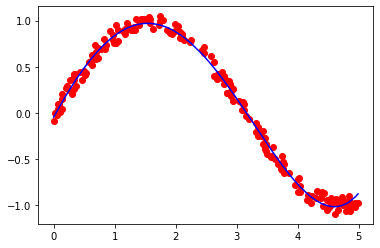

rmse =  0.05835260578629874
r2 =  0.9927912569254419


In [40]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
y_pred_poly=lin_reg2.predict(poly_reg.fit_transform(X))

#Visualising the pollynomial regression model results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_poly,color='blue')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

rmsep = np.sqrt(mean_squared_error(y,y_pred_poly))
r2p = r2_score(y,y_pred_poly)
print("rmse = ",rmsep)
print("r2 = ",r2p)

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Méthode 3 </B><br>
    <br>
2.10 Appliquez l’algo KNN en choisissant K=2 et en entrainant le modèle sur les données X et
y.<br><br>
2.11 Faites la prédiction sur X pour produire y_predknn.<br><br>
2.12 Visualisez ces données en les affichant sous forme de nuage de points. Tracez la courbe
prédictive des données en rouge.<br><br>
2.13 Affichez les scores RMSE et R2 entre y_predknn et y.<br>
    </div>


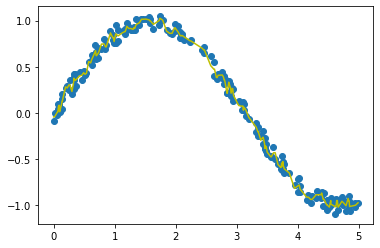

Score RMSE: 0.040810952771846216
Coefficient of determination: 1.00


In [42]:
import sklearn.neighbors

# Selection de l'algorihtme des k plus proches voisins
modelek = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)

# Entrainement du modèle
modelek.fit(X, y)

# Prediction
y_predknn = modelek.predict(X)

#Affichage du graphique
plt.scatter(X, y)
plt.plot(X, y_predknn, color='y')
plt.show()

# Mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_predknn))
print("Score RMSE:", rmse)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_predknn))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Etude comparative </B><br>
    <br>
2.14 Expliquez selon vous quelle méthode est la meilleure pour prédire le salaire du nouvel
employer. Analysez et discutez les résultats obtenus.<br>
        </div>

Le meilleur modèle pour prédire le salaire du nouvel employé est celui de la troisième méthode car le coefficient de détermination est égale à 1. Cela correspond à une prédiction parfaite.